In [30]:
import os
import pandas as pd
import numpy as np
home_dir = os.getcwd()
model_folder =  home_dir +'/../../data/model/'
model_path = model_folder + 'pca_model.csv'
media_folder =  home_dir +'/../../media/'

#https://telefonicatech.com/blog/python-para-todos-tutorial-de-pca-en-5

# <span style='color:red'> .<br> </span><span style='color:green'> Análisis de Componentes principales.<br></span><span style='color:blue'> Principal Components Analysis (PCA).<br></span>

In [31]:
#defining dtypes i save 65% of memory.
#Use to checkit sum(list(price.memory_usage()))
model_types = {"Nom_Barri":str,"Any":np.uint16,"Trimestre":np.uint8,"Eur":np.float32,"Eur_m2":np.float32,"Mat":np.uint8,"Tar":np.uint8,"Nit":np.uint8}
#modela = pd.read_csv(model_path)
model = pd.read_csv(model_path, dtype=model_types)
#(sum(list(modela.memory_usage())), sum(list(model.memory_usage())))

In [32]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nom_Barri  1802 non-null   object 
 1   Any        1802 non-null   uint16 
 2   Trimestre  1802 non-null   uint8  
 3   Eur        1802 non-null   float32
 4   Eur_m2     1802 non-null   float32
 5   Mat        1802 non-null   uint8  
 6   Tar        1802 non-null   uint8  
 7   Nit        1802 non-null   uint8  
dtypes: float32(2), object(1), uint16(1), uint8(4)
memory usage: 38.8+ KB


<span style='color:red'> Filtrage de dades(tercer trimestre de 2022).<br> </span><span style='color:green'> Filtrado de datos (tercer trimestre de 2022).<br></span><span style='color:blue'> Data filtering (Third quarter of 2022).<br></span>

In [33]:
grouped = model.groupby(["Any", "Trimestre"],group_keys=False)
counted_quarter = grouped.size().unstack()
counted_quarter

Trimestre,1,2,3,4
Any,,,,
2016,66.0,66.0,66.0,66.0
2017,66.0,67.0,67.0,67.0
2018,67.0,67.0,67.0,67.0
2019,67.0,67.0,67.0,67.0
2020,67.0,66.0,67.0,67.0
2021,67.0,67.0,67.0,66.0
2022,67.0,67.0,67.0,NaN


In [34]:
model_mask = (model.Any == 2022) & (model.Trimestre == 3)
data =model[model_mask]
data

,Nom_Barri,Any,Trimestre,Eur,Eur_m2,Mat,Tar,Nit
1735,el Raval,2022,3,928.099976,15.4,10,19,11
1736,el Barri Gòtic,2022,3,1111.300049,15.8,15,12,8
1737,la Barceloneta,2022,3,922.900024,17.6,10,19,9
1738,"Sant Pere, Santa Caterina i la Ribera",2022,3,1084.900024,17.0,5,16,6
1739,el Fort Pienc,2022,3,1118.699951,15.0,22,45,15
...,...,...,...,...,...,...,...,...
1797,Diagonal Mar i el Front Marítim del Poblenou,2022,3,1354.900024,17.6,11,10,6
1798,el Besòs i el Maresme,2022,3,761.400024,12.4,11,13,3
1799,Provençals del Poblenou,2022,3,1059.400024,14.8,11,8,4
1800,Sant Martí de Provençals,2022,3,1158.900024,12.3,8,3,1


### <span style='color:red'> Escalat de les variables<br> </span><span style='color:green'> Escalado de las variables <br></span><span style='color:blue'> Variable scaling <br></span>

In [35]:
data.loc[:,"Eur":"Nit"].mean(axis=0)

Eur       1004.190186
Eur_m2      14.243283
Mat         11.328358
Tar         15.522388
Nit          4.955224
dtype: float64

In [36]:
data.loc[:, "Eur":"Nit"].var(axis=0)

Eur       79596.179688
Eur_m2        4.536129
Mat         128.648123
Tar         279.132067
Nit          21.952510
dtype: float64

<span style='color:red'> Les diferències entre les mitjanes i les variàncies de les variables suggereixen escalar les variables.<br> </span><span style='color:green'> Las diferencias entre las medias y las varianzas de cada variable sugieren su escalado. <br></span><span style='color:blue'> The differences between the means and variances of the variables suggest scaling the variables. <br></span>

In [37]:
from sklearn.preprocessing import StandardScaler
#Split data set into numeric data and label(barri)
numeric_data=data.loc[:,"Eur":"Nit"]
barris = data.loc[:,"Nom_Barri"].sort_values()
#how many differente barris do we have. 
num_barris = len(barris.unique())
#Data standarization
std_numeric_data = StandardScaler().fit_transform(numeric_data)
#How many variables do we have
num_vars = std_numeric_data.shape[1]

<span style='color:red'> Matriu de covariances i càlcul dels seus vectors i valors propis.<br> </span><span style='color:green'> Matriz de covarianzas y cálculo de sus vectors y valores propios. <br></span><span style='color:blue'> Covariance matrix and calculation of its einge vectors and values. <br></span>

In [46]:
cov_mat=np.cov(std_numeric_data.T)
print('Covariance Matrix \n%s' %cov_mat)

Covariance Matrix 
[[1.01515152 0.77802943 0.35695252 0.35791324 0.3044259 ]
 [0.77802943 1.0151515  0.28967036 0.31013604 0.38384296]
 [0.35695252 0.28967036 1.01515152 0.94677493 0.79071767]
 [0.35791324 0.31013604 0.94677493 1.01515154 0.79157231]
 [0.3044259  0.38384296 0.79071767 0.79157231 1.01515153]]


In [43]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.3616365   0.6015544   0.4643976   0.53833549  0.04337182]
 [ 0.35491324  0.61661866 -0.41985327 -0.56089272 -0.05422729]
 [ 0.50400052 -0.31782927  0.31170154 -0.19478018 -0.71405243]
 [ 0.50657603 -0.30741192  0.27904035 -0.2936017   0.69628526]
 [ 0.4823068  -0.24979231 -0.65805526  0.52101149  0.02223175]]

Eigenvalues 
[3.18355583 1.31475445 0.33501798 0.17479663 0.06763272]


In [44]:
#  List of couples (eingevalue, eingevector)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Descendent sorted by eingevalue
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Total variance inside eingevalues
sum_eig_vals = sum(eig_vals)
acum_perc = 0
# Table showing variance explained by each eingevector
print('num\teingevalue\t\t%\t∑%')
for i, val in enumerate(eig_pairs):
    perc = val[0]/sum_eig_vals
    acum_perc += perc
    print("{}\t{}\t{:.2f}\t{:.2f}".format(i,val[0],perc, acum_perc ))

num	eingevalue		%	∑%
0	3.1835558348763993	0.63	0.63
1	1.3147544484145606	0.26	0.89
2	0.33501798260906274	0.07	0.95
3	0.1747966277674716	0.03	0.99
4	0.06763271682947153	0.01	1.00


<span style='color:red'> Dos components principals contenen el 89% de la informació.<br> </span><span style='color:green'> Dos componentes principales contiene el 89% de la información. <br></span><span style='color:blue'> Two principal components contain 89% of the information. <br></span>

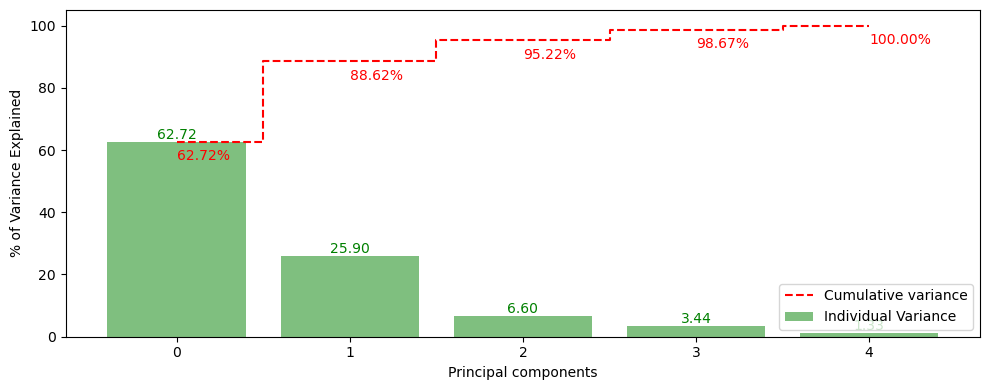

In [52]:
import matplotlib.pyplot as plt
# Chart showing variance explained by each eingevectror
var_exp = [(i / sum_eig_vals)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Bar chart of variance per eingevector & step chart with cumulative variance by eingevector
with plt.style.context('seaborn-v0_8-pastel'):
    plt.figure(figsize=(10, 4))

    p=plt.bar(range(num_vars), var_exp, alpha=0.5, align='center',
            label='Individual Variance', color='g')
    plt.bar_label(p, label_type='edge', fmt='%.2f', color='g')
    plt.step(range(num_vars), cum_var_exp, where='mid', linestyle='--', label='Cumulative variance', color='r')
    [plt.text(i, j-6, f'{j:.2f}%', color='r') for (i, j) in zip(range(num_vars), cum_var_exp)]
    plt.ylabel('% of Variance Explained')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    plt.savefig(media_folder + "EingeValues_variance.png")

<span style='color:red'> Comportament de les variables en els components.(factors de càrrega).<br> </span><span style='color:green'>Comportamiento de las variables en las componentes(coeficientes). <br></span><span style='color:blue'> Behavior of the variables inside the components (loading factors). <br></span>

In [100]:
#Eingevectors with shape 1 x num_vars are reshaped to num_vars x 1. 
#"Vertical" eingevectors are pasted together to form de "proyection Matrix"

matrix_w = np.hstack((eig_pairs[0][1].reshape(num_vars,1),
                      eig_pairs[1][1].reshape(num_vars,1)))
#Load factors visualization
coeficients= zip(list(numeric_data.columns),matrix_w)
print("Var\tPC-x\t PC-y")
for var, pcs in coeficients:
    print("{}\t{:.2f}\t{:6.2f}".format(var, pcs[0], pcs[1] ))


Var	PC-x	 PC-y
Eur	0.36	  0.60
Eur_m2	0.35	  0.62
Mat	0.50	 -0.32
Tar	0.51	 -0.31
Nit	0.48	 -0.25


<span style='color:red'> Al component principal pesen més els accidents que els preus. Al component segon els preus sumen i els accidents resten.<br> </span><span style='color:green'>En el componente principal pesan más los accidentes que los precios. En el componente segundo los precios suman y los accidentes restan. <br></span><span style='color:blue'> In the main component, accidents weigh more than prices. In the second component, prices add and accidents subtract. <br></span>

In [101]:
#data proyection on new ortogonal axes.
print("full data x matrix  = reduced data")
print(std_numeric_data.shape, "  x",matrix_w.shape, " = ({}, {})".format(std_numeric_data.shape[0],matrix_w.shape[1]))
components = std_numeric_data.dot(matrix_w)

full data x matrix  = reduced data
(67, 5)   x (5, 2)  = (67, 2)


In [ ]:
#generated with http://medialab.github.io/iwanthue/
# Color      one         two        three     four       five       six
#2345678901234567890123456789012345678901234567890123456789012345678901234567890
#        1         2         3         4         5         6         7         8 
# 73 colors

all_colors = ["#e576b7", "#54c34e", "#8458d9", "#93c23c", "#3959cf", "#c5b63b", \
              "#457bed", "#91a936", "#9e42b8", "#489932", "#c83aa2", "#4fce8d", \
              "#e272d8", "#45a867", "#c578e8", "#6c892c", "#8974e4", "#e69c37", \
              "#664db1", "#92bc6c", "#bb2772", "#55cebc", "#e13365", "#3a7a33", \
              "#e84a90", "#367949", "#db3941", "#50c1e3", "#e15d29", "#4a92eb", \
              "#b78629", "#476ac2", "#b35d1f", "#9a8ce4", "#4c6a18", "#8f5cb6", \
              "#90832e", "#6e4996", "#c0b46f", "#9a4190", "#60ad85", "#b12e4b", \
              "#33a29e", "#ab3422", "#3b8dbb", "#de6550", "#3868a9", "#ec8c62", \
              "#5d5ca7", "#695f17", "#d293d6", "#4d662b", "#aa3b6e", "#24765a", \
              "#e25e73", "#699ad9", "#815a16", "#aaa4e3", "#8a4722", "#4a5589", \
              "#d59d6a", "#726da6", "#849357", "#975b9b", "#726c37", "#e2799a", \
              "#9d6b3c", "#bd76a4", "#b0584c", "#8d476f", "#e58c8c", "#8d3f52", \
              "#ae5b6a"]

unsorted_colors = all_colors[:num_barris]
colors = sorted(unsorted_colors)

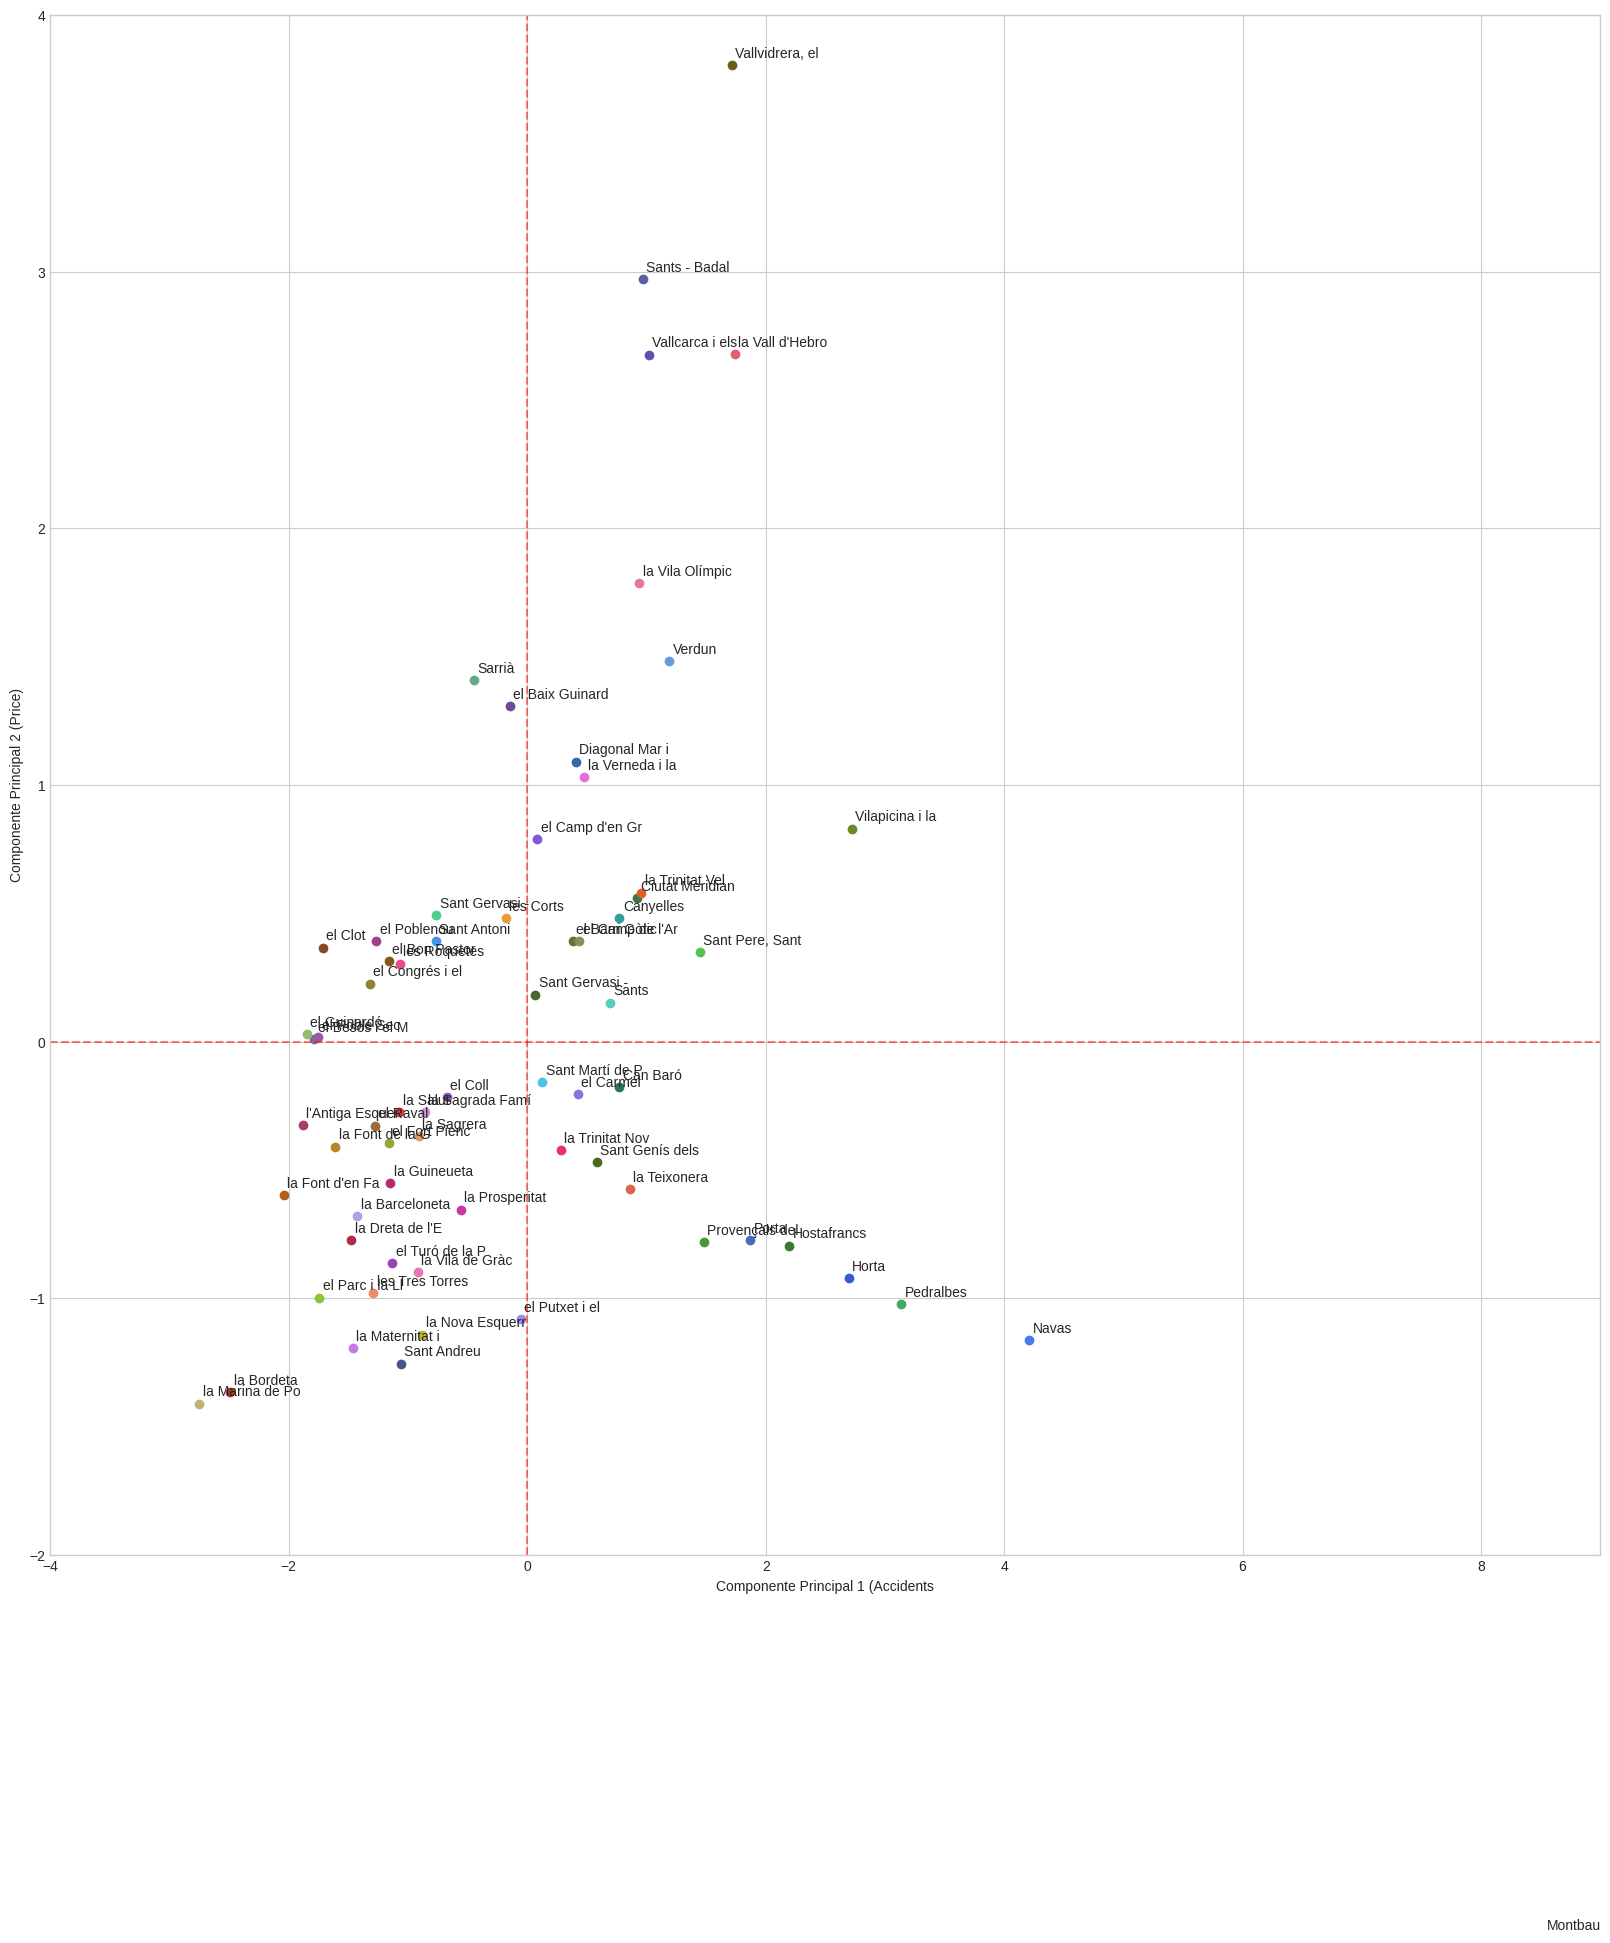

In [119]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    fig = plt.figure(figsize=(20, 20))
    for lab, col in zip(barris, colors):
        x = components[barris==lab, 0]
        y = components[barris==lab, 1]
        plt.scatter(x, y, label=lab, c=col)
        plt.text(x + 0.03, y + 0.03, lab[:15], fontsize=10)
    plt.xlabel('Componente Principal 1 (Accidents')
    plt.ylabel('Componente Principal 2 (Price)')
    plt.ylim(-2, 4)
    plt.xlim(-4,9)
    plt.axvline(x = 0, color = 'red', linestyle = '--', alpha = 0.5)
    plt.axhline(y= 0, color = 'red', linestyle = '--', alpha = 0.5)
    plt.show()
    fig.savefig(media_folder + "pca_barris.png")